# CENTER REGRESSION TRAINING DEMO ON TEST DATASET

Demonstration of 17 ckpt from 
https://app.clear.ml/projects/fcd61b2d4f8f4a19b16d82e73646d804/experiments/1d8c0821168946df8eedc3b3a15215a3/output/execution

In [ ]:
import os 
import sys 
import numpy as np 
import matplotlib.pyplot as plt 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.analytics.analyse_regressor import compute_MSE_on_dataset, plot_top_10_predictions
from src.consts import TEST_TEXTURE_ROOT, TEST_COLOR_ROOT, REPO_FOLDER
from src.consts import CENTER_REGRESSION_REFRENCE_CKPT
from src.data.dataset import CenterRegressionDatasetReader
from src.analytics.analyse_regressor import CenterRegressionPredsMemCacher
from src.schemas.config.train_config import TrainConfig
from src.train.center_regressor_train import CenterRegressionLightningModule
import torch 
from src.utils import read_yaml

Посмотрим как работает на 2 тестовых сабсетах. Первый использует цветные изображения аналогичные тем, что были в трейне и тесте, во втором изображения из другого домена: фигуры и фон заполнены абстрактными текстурами 

In [ ]:
CONFIG_PATH = REPO_FOLDER / "configs" / "train_center_regression.yml"
config_data = read_yaml(CONFIG_PATH)
config = TrainConfig.model_validate(config_data)
model = CenterRegressionLightningModule(config)
model.load_state_dict(
    torch.load(CENTER_REGRESSION_REFRENCE_CKPT)["state_dict"]
)
model.eval()

Цветные фигуры

MSE = 0.00010590536840027198


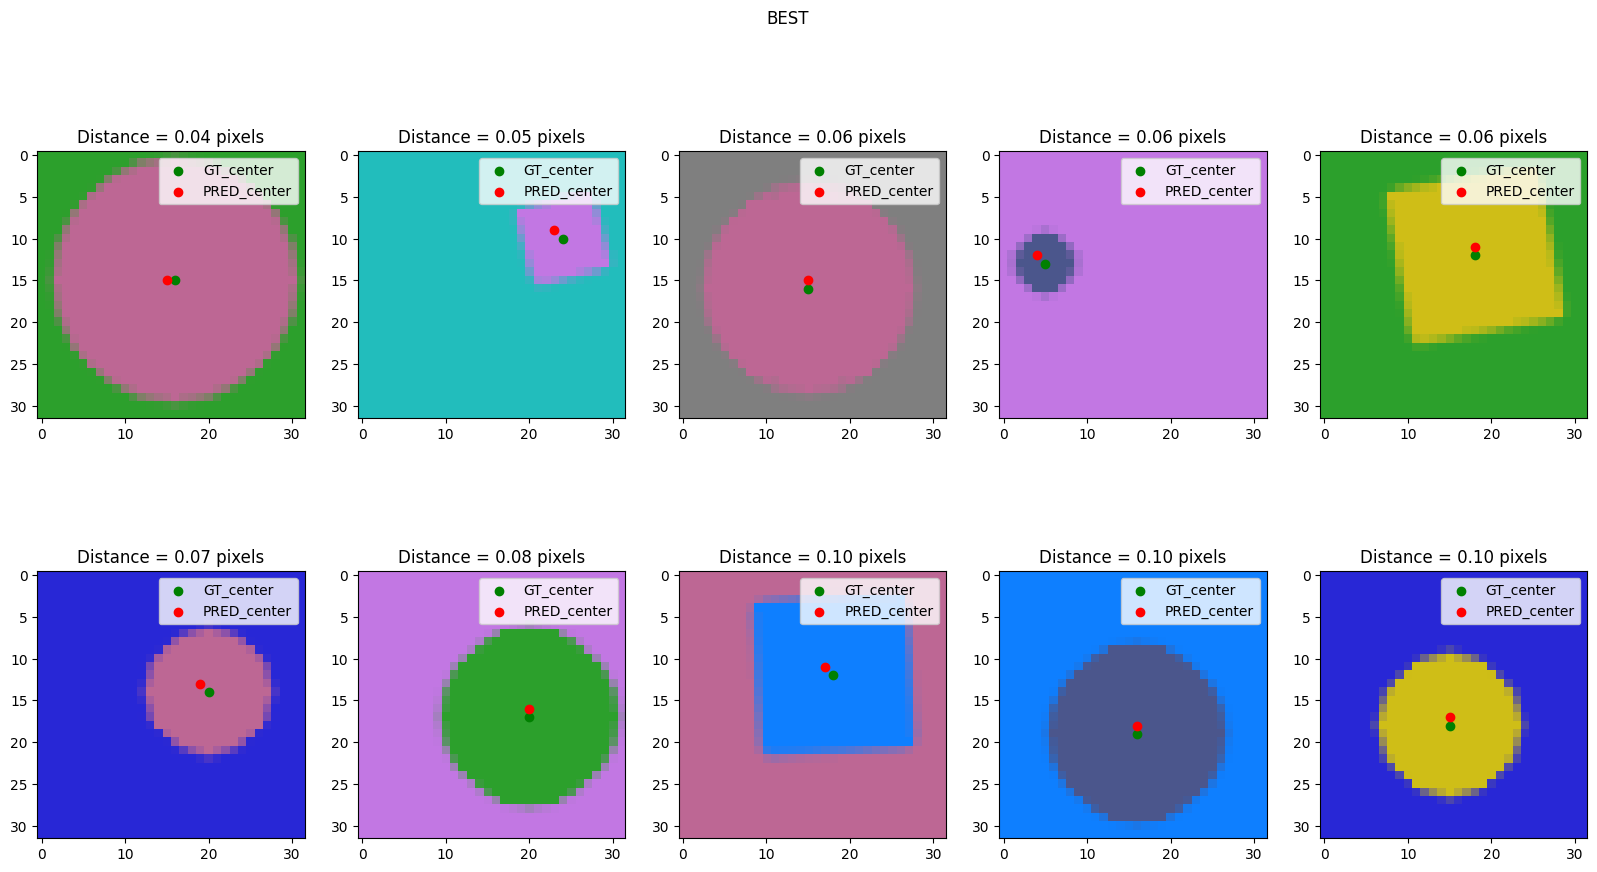

In [4]:
dataset = CenterRegressionDatasetReader(TEST_COLOR_ROOT)
dataset = CenterRegressionPredsMemCacher(dataset, model)
mse = compute_MSE_on_dataset(dataset)
print(f"MSE = {mse}")
fig = plot_top_10_predictions(dataset, mode="best")
fig.suptitle("BEST");

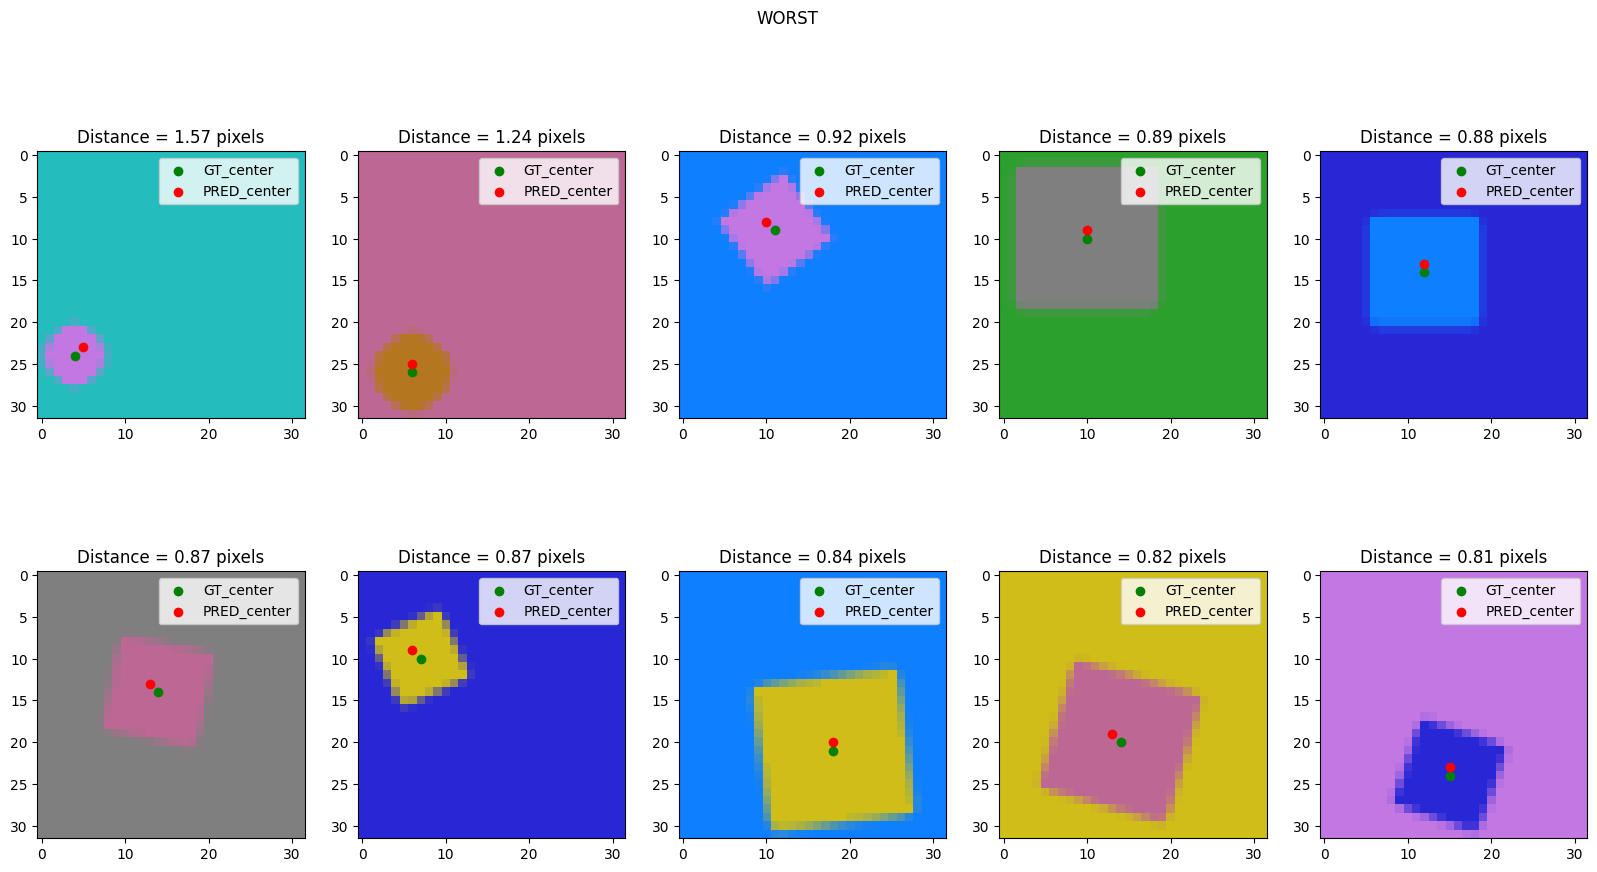

In [5]:
fig = plot_top_10_predictions(dataset, mode="worst")
fig.suptitle("WORST");

Фигуры из текстур

MSE = 0.013261157087981701


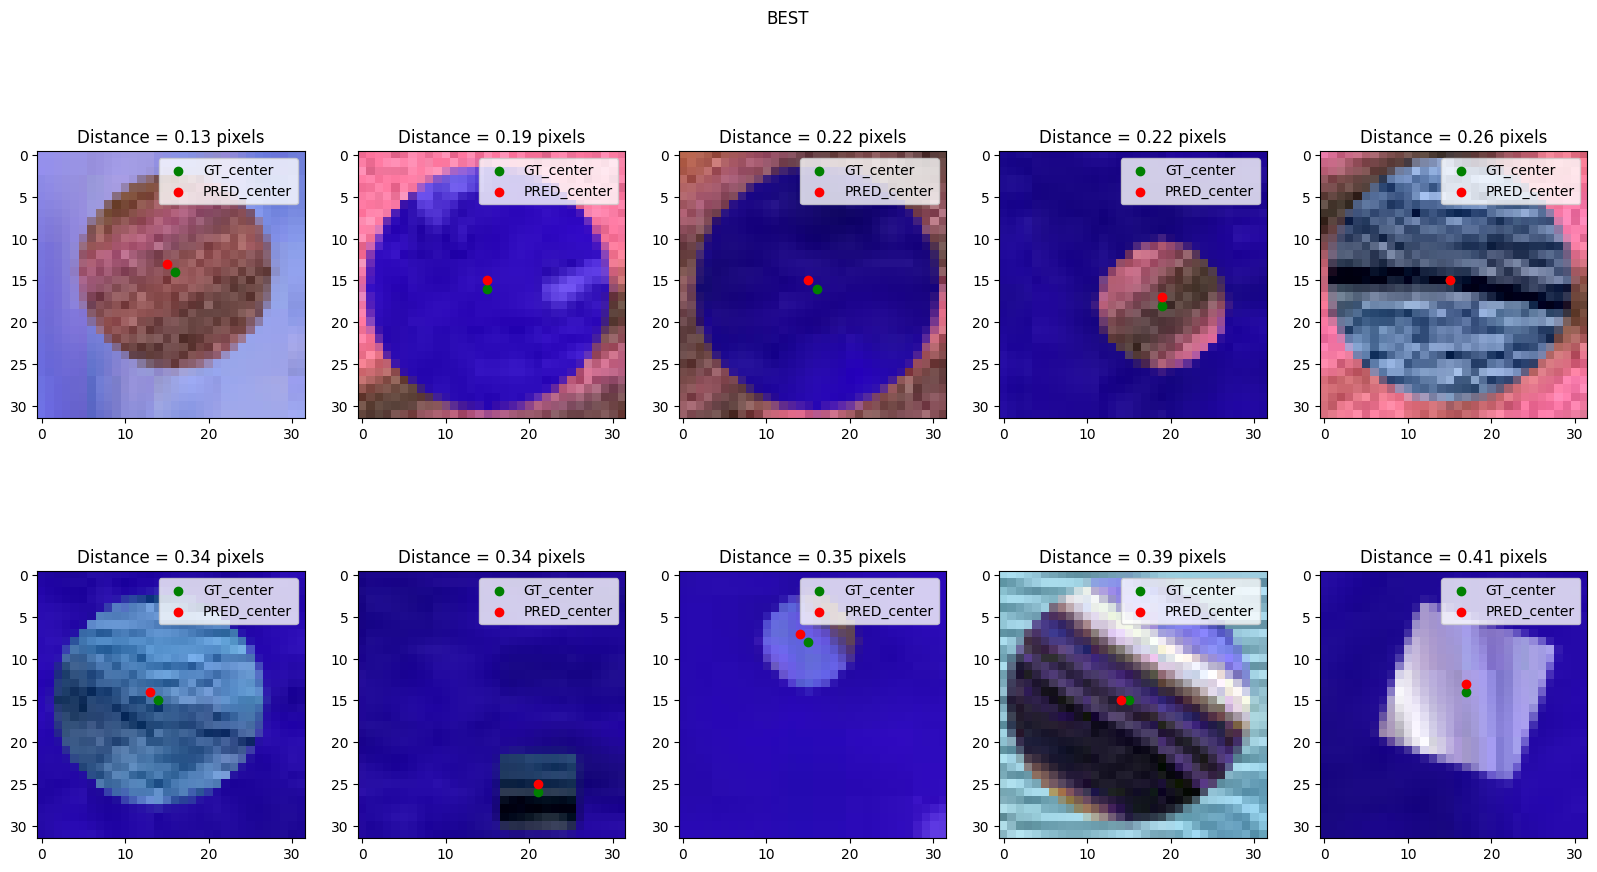

In [6]:
dataset = CenterRegressionDatasetReader(TEST_TEXTURE_ROOT)
dataset = CenterRegressionPredsMemCacher(dataset, model)
mse = compute_MSE_on_dataset(dataset)
print(f"MSE = {mse}")
fig = plot_top_10_predictions(dataset, mode="best")
fig.suptitle("BEST");

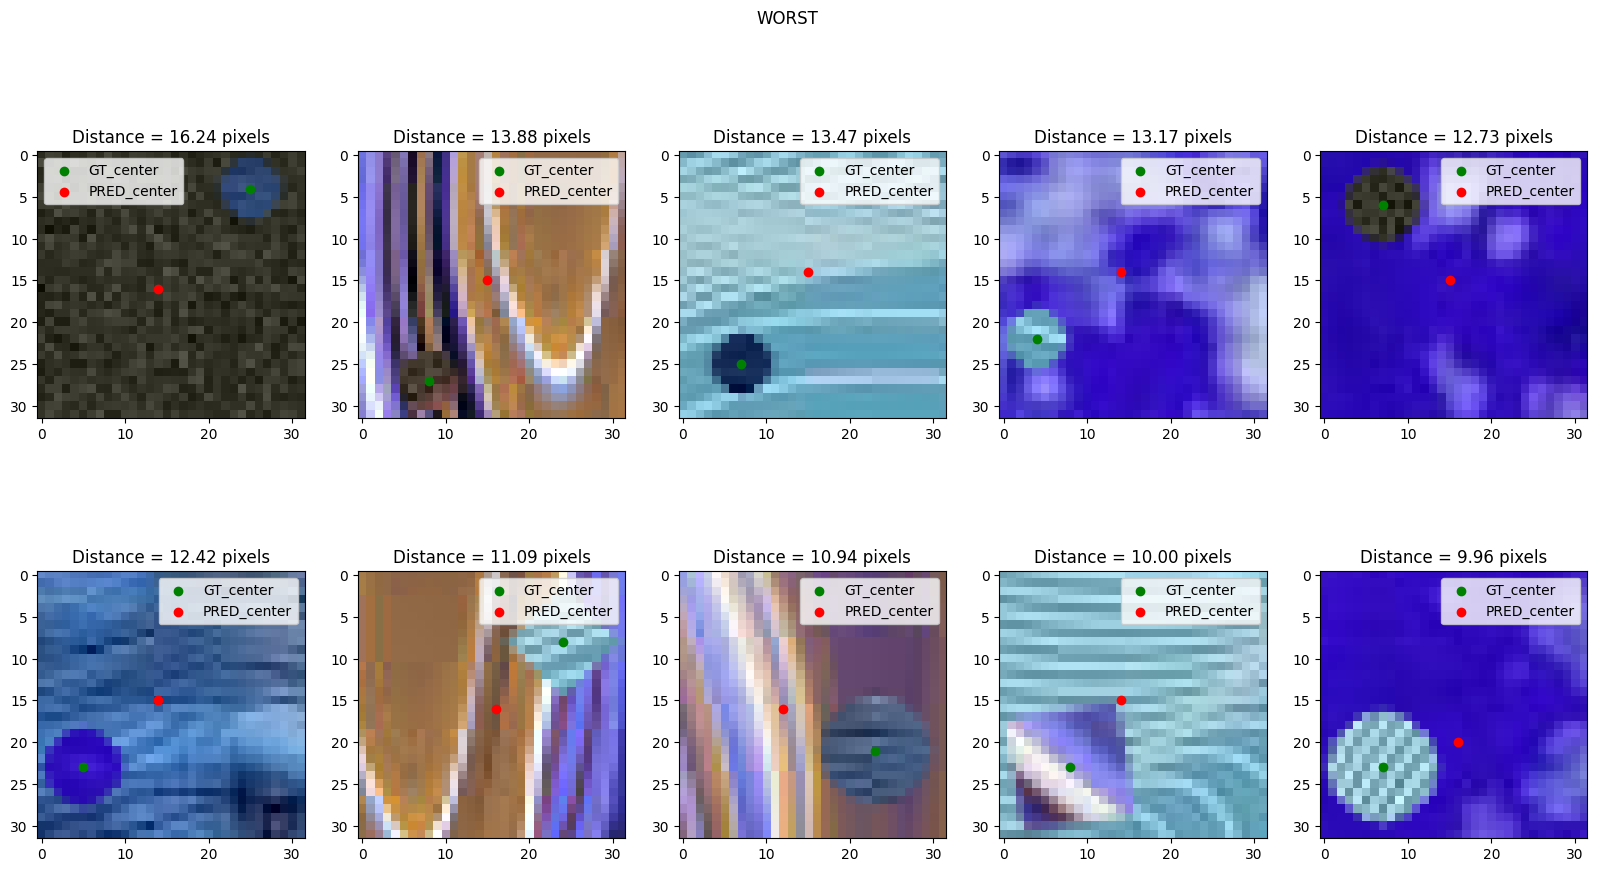

In [7]:
fig = plot_top_10_predictions(dataset, mode="worst")
fig.suptitle("WORST");